Size	Bubble Sort	Quicksort
100	0.0027s		0.0011s
500	0.0598s		0.0041s
1000	0.3314s		0.0050s
2000	1.0690s		0.0140s
5000	8.0447s		0.0377s
10000	26.7565s		0.0776s


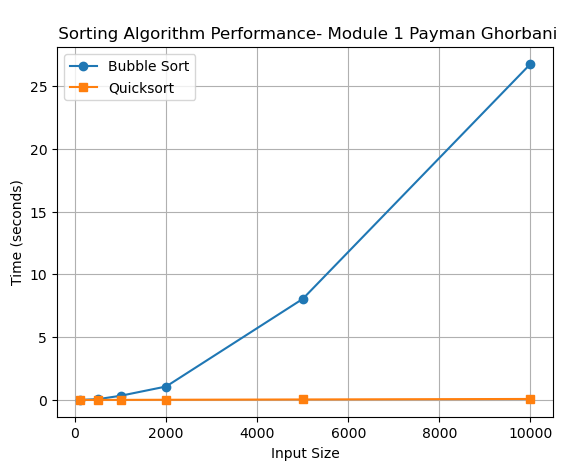

In [16]:
import random
import time

# Bubble sort function
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

#Quick sort function - Divide and conquer
def quicksort(arr):
    #if list is empty /only one element it's already sorted
    if len(arr) <= 1:
        return arr
    #first element as pivot
    pivot = arr[0]
    #using list comprehension to create left and right lists
    left = [x for x in arr[1:] if x < pivot]
    right = [x for x in arr[1:] if x >= pivot]
    #function call itself; quicksort(left) will sort out the list left
    return quicksort(left) + [pivot] + quicksort(right)

# Function to measure time for bubble and quick sort
def measure_sort_time(sort_func, data):
    #save the current time in start variable
    start = time.time()
    
    # Use copy to avoid in-place mutation
    result = sort_func(data.copy()) 
    #record the current time after the sorting finishes and save it to end variable
    end = time.time()
    #total time of sorting
    return end - start

# \list of  different Sizes to test
sizes = [100, 500, 1000, 2000, 5000, 10000]
#placeholders that record the time taken for sorting out process
bubble_times = []
quick_times = []

# Run tests
for size in sizes:
    #pick random number between 0-1000, does this "size" tim; for size=100 it create 100 numbers between 0-1000 and save it in test_data
    test_data = [random.randint(0, 1000) for _ in range(size)]
    
    #It times how long bubble_sort takes to sort the test_data and appends (adds) that time to the bubble_times logbook.
    bubble_times.append(measure_sort_time(bubble_sort, test_data))
    
    #It times how long quicksort takes to sort a copy of the same test_data and adds that time to the quick_times logbook.
    quick_times.append(measure_sort_time(quicksort, test_data))

# Display results in a table above the diagram
print("Size\tBubble Sort\tQuicksort")
for i in range(len(sizes)):
    print(f"{sizes[i]}\t{bubble_times[i]:.4f}s\t\t{quick_times[i]:.4f}s")

import matplotlib.pyplot as plt

plt.plot(sizes, bubble_times, label='Bubble Sort', marker='o')
plt.plot(sizes, quick_times, label='Quicksort', marker='s')
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('\n Sorting Algorithm Performance- Module 1 Payman Ghorbani')
plt.legend()
plt.grid(True)
plt.show()

